In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im

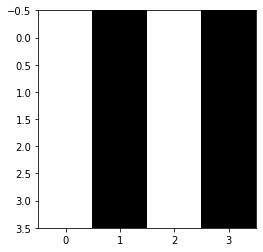

In [38]:
x = np.array([[255,0,255,0],
              [255,0,255,0],
              [255,0,255,0],
              [255,0,255,0]])
plt.imshow(x,cmap='gray')
plt.show()

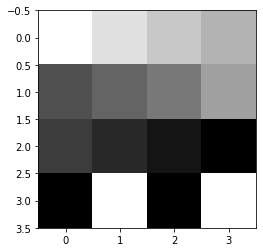

In [39]:
x = np.array([[255,225,200,180],
              [80,100,120,160],
              [60,40,20,0],
              [0,255,0,255]])
plt.imshow(x,cmap='gray')
plt.show()

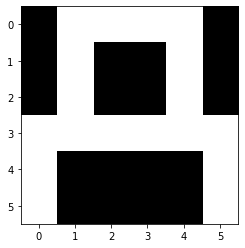

In [40]:
## Create an image of size 6x6 which has first letter of your name
## in white color on black background

x = np.array([[0,255,255,255,255,0],
             [0,255,0,0,255,0],
             [0,255,0,0,255,0],
             [255,255,255,255,255,255],
             [255,0,0,0,0,255],
             [255,0,0,0,0,255]])
plt.imshow(x,cmap='gray')
plt.show()

In [41]:
x.shape

(6, 6)

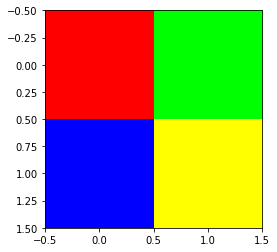

In [42]:
y = np.array([ [[255,0,0] , [0,255,0]],
               [[0,0,255] , [255,255,0]] ])
plt.imshow(y)
plt.show()

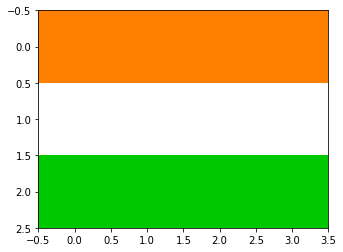

In [43]:
y = np.array([[[255,128,0],[255,128,0],[255,128,0],[255,128,0]],
              [[255,255,255],[255,255,255],[255,255,255],[255,255,255]],
              [[0,200,0],[0,200,0],[0,200,0],[0,200,0]]])
plt.imshow(y)
plt.show()

In [44]:
y.shape

(3, 4, 3)

In [45]:
# loading an image
img = im.imread(r"C:\Users\anshu\Pictures\dog.jpg")
img.shape

(220, 353, 3)

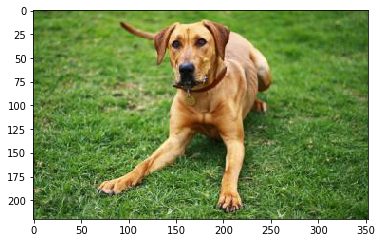

In [46]:
plt.imshow(img)
plt.show()

In [47]:
%matplotlib qt
plt.imshow(img)
plt.show()

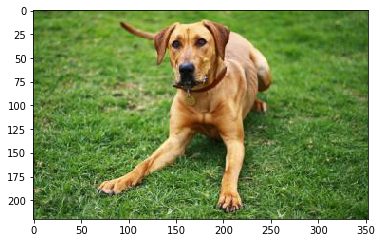

In [48]:
%matplotlib inline
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


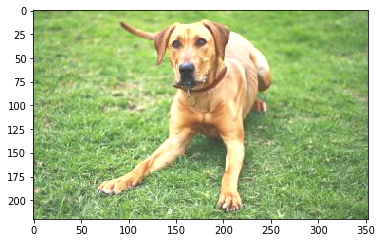

In [49]:
factor = np.ones(img.shape,dtype='int32')
img2 = img + 50*factor
plt.imshow(img2)
plt.show()

In [50]:
50*np.ones((3,4))

array([[50., 50., 50., 50.],
       [50., 50., 50., 50.],
       [50., 50., 50., 50.]])

In [51]:
img.shape

(220, 353, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


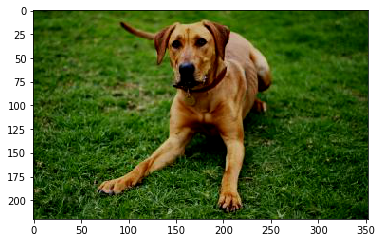

In [52]:
factor = np.ones(img.shape,dtype='int32')
img2 = img - 50*factor
plt.imshow(img2)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


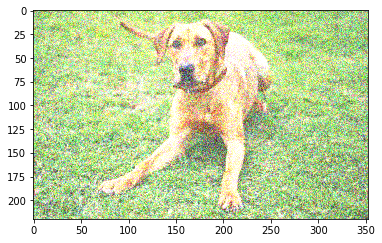

In [53]:
noise= np.random.randint(20,160,img.shape)
img4 = img + noise
plt.imshow(img4)
plt.show()

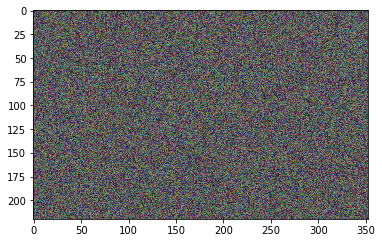

In [54]:
plt.imshow(noise)
plt.show()

In [55]:
img.shape

(220, 353, 3)

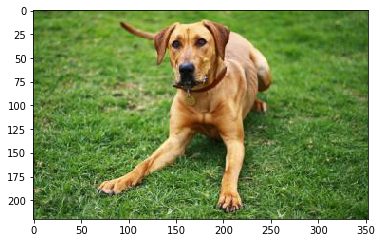

In [56]:
plt.imshow(img)
plt.show()

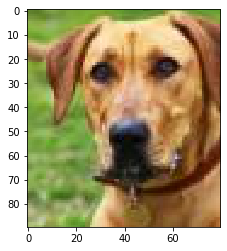

In [57]:
img5 = img[10:100,120:200]
plt.imshow(img5)
plt.show()

In [36]:
np.random.randint(4,100,(5,6))

array([[95, 62, 61, 57, 54,  6],
       [87, 27, 60, 26,  8,  8],
       [ 4, 76, 95, 70, 39, 17],
       [15, 40, 24, 95, 60, 60],
       [77, 98, 78, 34, 50, 18]])

In [58]:
import cv2

In [60]:
img = cv2.imread(r"E:\image_data\cat.jpeg",0)
img.shape

(350, 525)

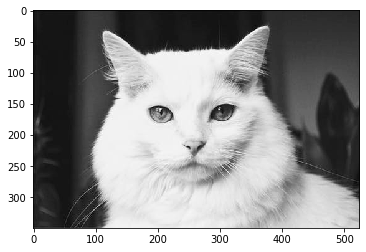

In [61]:
plt.imshow(img,cmap='gray')
plt.show()

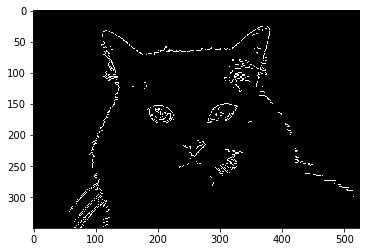

In [67]:
img2 = cv2.Canny(img,200,255)
plt.imshow(img2,cmap='gray')
plt.show()

#### Morphological Analysis
- Erosion  - loss of pixels from boundary
- Dilation - gain of pixels to boundary

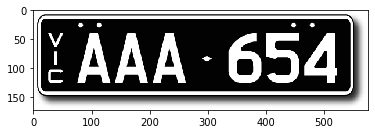

In [68]:
img = cv2.imread(r"E:\image_data\np2.jpg",0)
plt.imshow(img,cmap='gray')
plt.show()

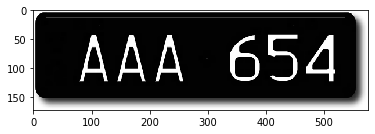

In [71]:
kernel = np.ones((7,7))
img2 = cv2.erode(img,kernel)
plt.imshow(img2,cmap='gray')
plt.show()

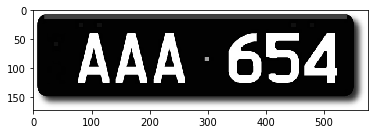

In [72]:
img3 = cv2.dilate(img2,kernel)
plt.imshow(img3,cmap='gray')
plt.show()

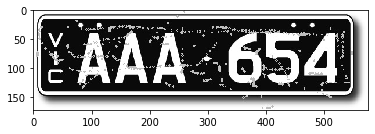

In [73]:
img = cv2.imread(r"E:\image_data\np3.jpg",0)
plt.imshow(img,cmap='gray')
plt.show()

#### COlor Detection

In [74]:
def color_detect(img):
    img2 = img.copy()
    m,n,q = img.shape
    for i in range(m):
        for j in range(n):
            if img[i,j,0]<50 and img[i,j,1]<50 and img[i,j,2]<50:
                img2[i,j,0]=255
                img2[i,j,1]=255
                img2[i,j,2]=255
    return img2

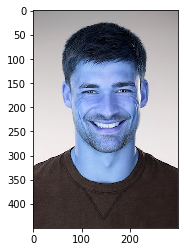

In [75]:
img = cv2.imread(r"E:\image_data\happy1.jpg")
plt.imshow(img)
plt.show()

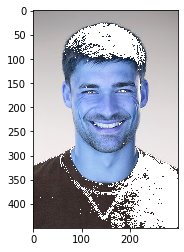

In [76]:
img2 = color_detect(img)
plt.imshow(img2)
plt.show()

In [80]:
# working with video
vid = cv2.VideoCapture(0)
while True:
    flag,img = vid.read()
    img = color_detect(img)
    cv2.imshow("image",img)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
vid.release()
cv2.destroyAllWindows()

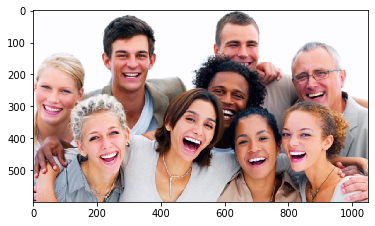

In [95]:
fd = cv2.CascadeClassifier(r"E:\image_data\haarcascade_frontalface_alt.xml")
img = im.imread(r"E:\image_data\people.jpg")
plt.imshow(img)
plt.show()

In [96]:
corners = fd.detectMultiScale(img)
corners

array([[236,  87, 146, 146],
       [  6, 200, 129, 129],
       [795, 144, 159, 159],
       [544, 205, 138, 138],
       [591,  56, 137, 137],
       [142, 330, 169, 169],
       [614, 346, 160, 160],
       [745, 328, 161, 161],
       [440, 290, 159, 159]], dtype=int32)

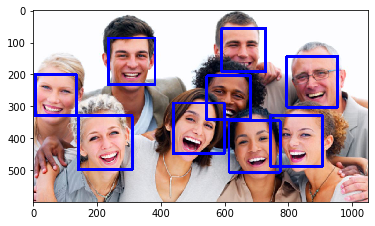

In [98]:
for x,y,w,h in corners:
    cv2.rectangle(img,(x,y),(x+w,y+h),[0,0,255],8)
plt.imshow(img)
plt.show()

In [102]:
# working with video
vid = cv2.VideoCapture(0)
while True:
    flag,img = vid.read()
    corners = fd.detectMultiScale(img)
    for x,y,w,h in corners:
        cv2.rectangle(img,(x,y),(x+w,y+h),[0,0,255],3)
    cv2.imshow("image",img)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
vid.release()
cv2.destroyAllWindows()

In [101]:
vid.release()